# NOBEL PRIZE WINNERS ANALYSIS - Jazil Notebook

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [13]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import os
# Start coding here!

In [14]:
## LOADING DATASET
#pd.read_csv('nobel.csv')
print(os.getcwd())
nobel_csv=pd.read_csv('data/nobel.csv')
nobel_csv.head()

/work/files/workspace


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


What is the most commonly awarded gender and birth country?

In [15]:
print(nobel_csv['sex'].value_counts())
top_gender=nobel_csv['sex'].value_counts().sort_values(ascending=False).index[0]

Male      905
Female     65
Name: sex, dtype: int64


In [16]:
print(nobel_csv['birth_country'].value_counts())
top_country=nobel_csv['birth_country'].value_counts().sort_values(ascending=False).index[0]

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [17]:
nobel_csv['decade']=nobel_csv['year'].apply(lambda x: x//10*10)

In [18]:
UScount=nobel_csv[nobel_csv['birth_country']=='United States of America'].groupby('decade').size().reset_index().rename(columns={0:'USCount'})

Overallcount=nobel_csv.groupby('decade').size().reset_index().rename(columns={0:'OverallCount'})

In [19]:
finalcountstable=pd.merge(Overallcount,UScount,on='decade')
finalcountstable['ratio']=finalcountstable['USCount']/finalcountstable['OverallCount']
max_decade_usa=finalcountstable[finalcountstable['ratio']==finalcountstable['ratio'].max()]['decade'].values[0]

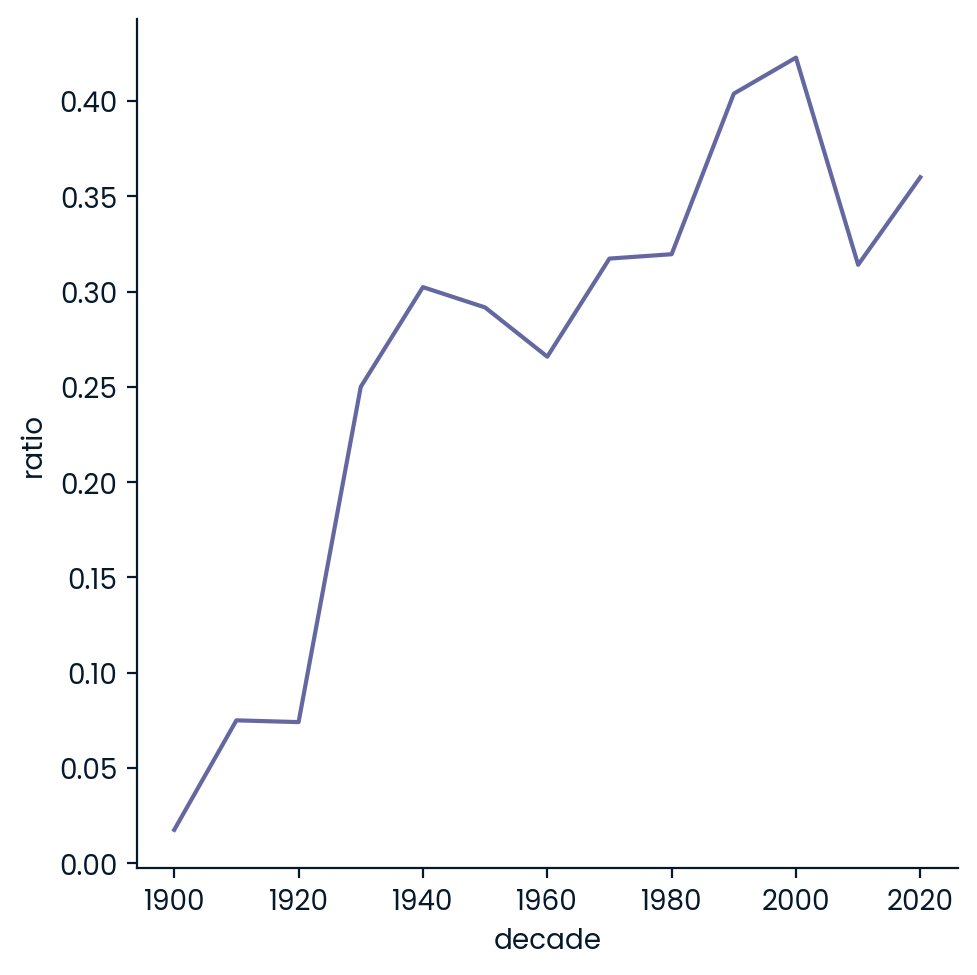

In [20]:
#nobel_csv['usa_born_winner']=nobel_csv['birt_country']=='United States of America'
sns.relplot(x='decade',y='ratio',data=finalcountstable,kind='line')

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [21]:
gendermap={'Male':0,'Female':1}

nobel_csv['genderbinary']=nobel_csv['sex'].map(gendermap)

femalproptable=nobel_csv.groupby(['decade','category']).agg(femaleprop=('genderbinary','mean')).reset_index()

femalproptable[femalproptable['femaleprop']==femalproptable['femaleprop'].max()]
max_female_dict={2020:'Literature'}

In [22]:
femalproptable

,decade,category,femaleprop
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.076923
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.500000


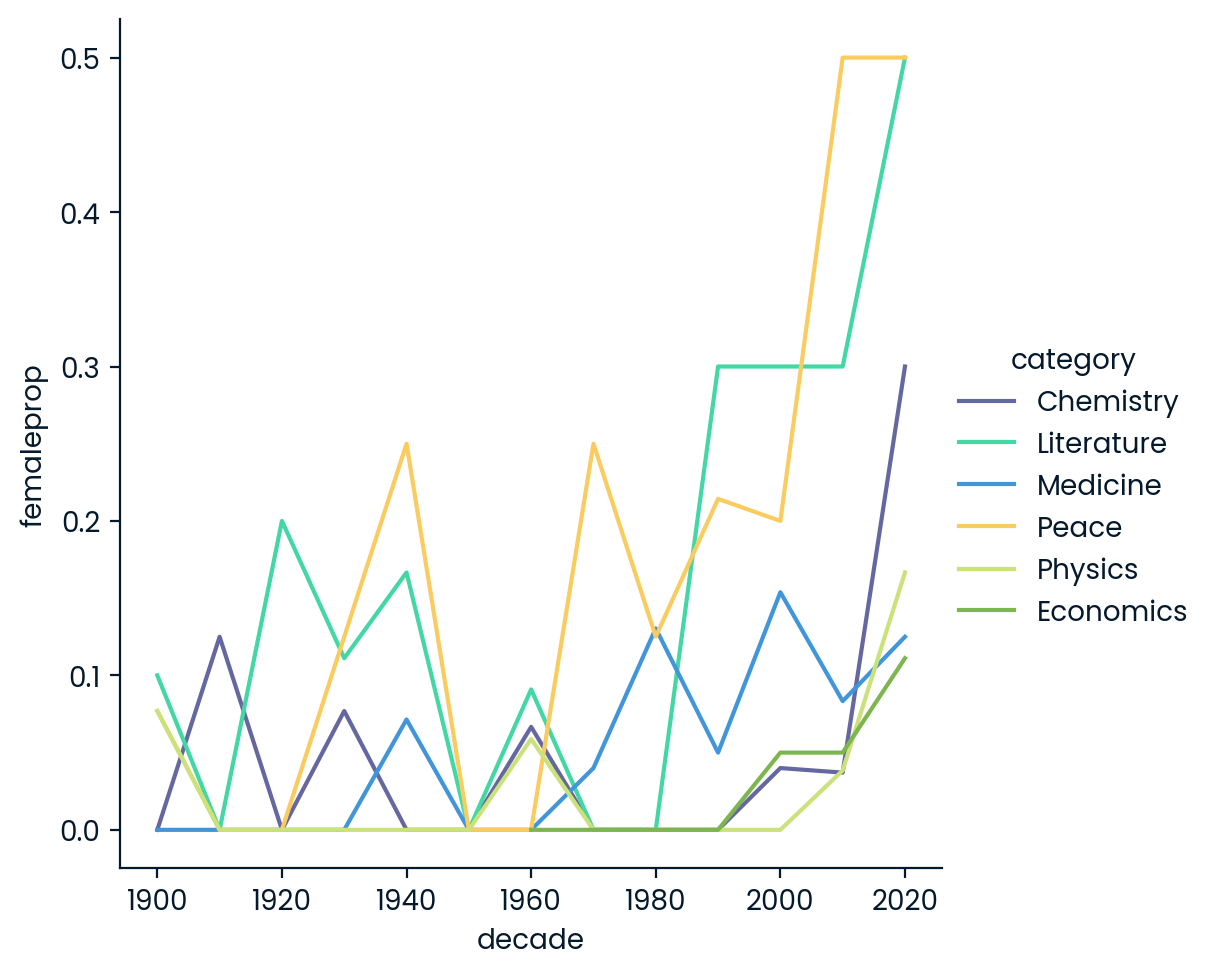

In [23]:
sns.relplot(x='decade',y='femaleprop',hue='category',kind='line',data=femalproptable)

Who was the first woman to receive a Nobel Prize, and in what category?

In [24]:
first_woman_category=nobel_csv[nobel_csv['sex']=='Female'].sort_values('year')['category'].values[0]

In [25]:
first_woman_name=nobel_csv[nobel_csv['sex']=='Female'].sort_values('year')['full_name'].values[0]

Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [26]:
indcount=nobel_csv.groupby('full_name').size().reset_index().rename(columns={0:'individuals_count'})
ind_list=indcount[indcount['individuals_count']>1]['full_name'].tolist()

orgcount=nobel_csv.groupby('organization_name').size().reset_index().rename(columns={0:'organization_name_count'})
org_list=orgcount[orgcount['organization_name_count']>1]['organization_name'].tolist()
repeat_list=ind_list